<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/JJ_Predict_Weekend_Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
data = pd.read_csv('https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
Date,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,0.116129,5.483871,18.4,2.490323,15.909677,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633
2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,0.116129,-4.016129,0.2,2.490323,-2.290323,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194
2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,0.116129,-6.316129,0.0,2.490323,-2.490323,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753
2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928,480,7872,11756,208,0,246,13899,35389
2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803,398,4714,8381,169,0,156,8505,23126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,2020,2,2020-02,25,Tuesday,False,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650,15097,29727,36973,17192,6865,10485,99431,229420
2020-02-26,2020,2,2020-02,26,Wednesday,False,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596,13557,26690,33732,14331,6215,9749,98193,215063
2020-02-27,2020,2,2020-02,27,Thursday,False,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349,13074,26818,34180,15281,5522,9151,94998,210373


In [16]:
saturday_data = data.loc[data['Weekday'] == 'Saturday']
sunday_data = data.loc[data['Weekday'] == 'Sunday']
weekend_data= pd.concat([saturday_data, sunday_data])
weekend_data = weekend_data.sort_values(by='Date' ,ascending=True)
weekend_data

,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership
Date,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,0.116129,-9.316129,0.2,2.490323,-2.290323,0.5,928,480,7872,11756,208,0,246,13899,35389
2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,0.116129,-5.616129,0.0,2.490323,-2.490323,0.5,803,398,4714,8381,169,0,156,8505,23126
2017-03-11,2017,3,2017-03,11,Saturday,False,-5.3,-12.5,-8.9,0.116129,-9.016129,0.2,2.490323,-2.290323,0.5,877,463,6397,11193,174,0,199,10584,29887
2017-03-12,2017,3,2017-03,12,Sunday,False,-3.8,-12.5,-8.2,0.116129,-8.316129,0.0,2.490323,-2.490323,0.5,756,345,4031,6915,97,2,102,6721,18969
2017-03-18,2017,3,2017-03,18,Saturday,False,3.1,0.1,1.6,0.116129,1.483871,1.5,2.490323,-0.990323,0.0,1187,632,8199,13669,210,0,276,15697,39870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-15,2020,2,2020-02,15,Saturday,False,1.1,-8.7,-3.8,-1.906897,-1.893103,0.4,2.137931,-1.737931,0.0,1535,259,8070,11895,98,0,1014,15296,38167
2020-02-16,2020,2,2020-02,16,Sunday,False,4.3,-1.5,1.4,-1.906897,3.306897,0.4,2.137931,-1.737931,0.0,1501,169,6133,9534,73,0,795,12262,30467
2020-02-22,2020,2,2020-02,22,Saturday,False,5.5,-3.2,1.1,-1.906897,3.006897,0.2,2.137931,-1.937931,0.0,2323,271,9654,15429,121,0,1181,17267,46246


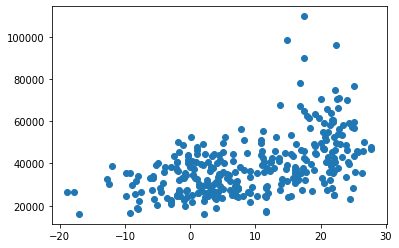

In [17]:
plt.scatter(weekend_data['Mean Temp (°C)'], weekend_data['Total GO Ridership'])

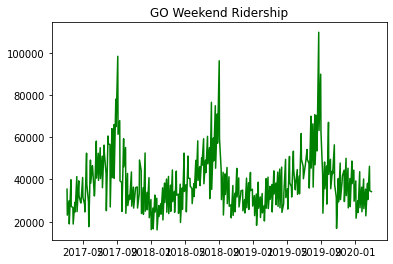

In [18]:
plt.plot(weekend_data.index, weekend_data['Total GO Ridership'], color='green')
plt.title('GO Weekend Ridership')
plt.show()

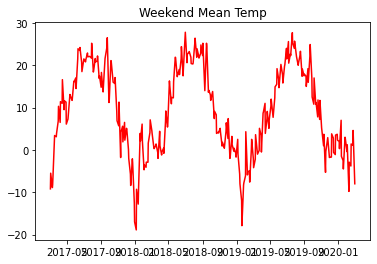

In [19]:
plt.plot(weekend_data.index, weekend_data['Mean Temp (°C)'], color='red')
plt.title('Weekend Mean Temp')
plt.show()

In [26]:
Y = weekend_data['Total GO Ridership']
X = weekend_data['Mean Temp (°C)'].values.reshape(-1, 1)

weekend_model = sklearn.linear_model.LinearRegression().fit(X,Y)
print(weekend_model.coef_)
print(weekend_model.intercept_)

[676.2379094]
32536.75559917469


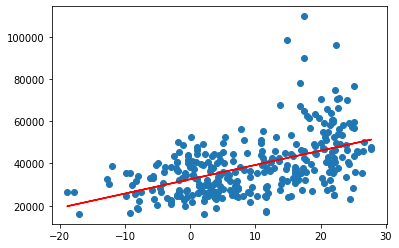

In [28]:
weekend_predict = weekend_model.predict(X)
plt.scatter(x=weekend_data['Mean Temp (°C)'], y=weekend_data['Total GO Ridership'])
plt.plot(X, weekend_predict, 'r-')
plt.show()